# Análise exploratória de dados

### Conjuntos de dados utilizados

Para o exemplo vamos utilizar o conjunto de dados de terremotos ocorridos de 2010 a 2022 com magnitude maior que 6 na escala Richter, que pode ser obtido [nesse endereço](https://www.kaggle.com/datasets/chandrimad31/earthquakes-20102022-above-6-richter-magnitude) (kaggle).

## 1. Ajustes

Vamos importar as bibliotecas obrigatórias e configurar o ambiente.

In [1]:
home <- path.expand("~")
lib_dir <- file.path(file.path(home, "R"), "lib")
dir.create(lib_dir, showWarnings = FALSE)

library(utils)
.libPaths(c(lib_dir, .libPaths()))

# libraries needed for these examples
install.packages("tidyverse")
library(tidyverse)

install.packages("matrixStats")
library(matrixStats)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘matrixStats’


The following object is masked from ‘package:dplyr’:

    count




## 2. Carregar os dados no dataframe

### Info

**Mag** - earthquake magnitude

**Nst** - Number of seismic stations which reported

**Gap** - segment of an active fault known to produce significant earthquakes that has not slipped in an unusually long time

**Rms** - root-mean-squared travel time residual in sec. Provides a measure of the fit of the observed arrival times to the predicted arrival times for this location

original -> https://www.kaggle.com/datasets/chandrimad31/earthquakes-20102022-above-6-richter-magnitude

In [36]:
df <- read_csv("https://raw.githubusercontent.com/MarcosVel/Exploratory-Analysis-Earthquakes/master/Earthquake_2010_to_2022_above_6mag.csv")
df

Rows: 1749 Columns: 22
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (8): magType, net, id, place, type, status, locationSource, magSource
dbl  (12): latitude, longitude, depth, mag, nst, gap, dmin, rms, horizontalE...
dttm  (2): time, updated

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,⋯,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dttm>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
2022-05-19 10:13:31,-54.1373,159.0844,10.00,6.9,mww,NA,39,0.369,0.94,⋯,2022-05-21 12:51:07,Macquarie Island region,earthquake,4.1,1.7,0.078,16,reviewed,us,us
2022-05-10 23:06:32,-23.5057,-66.6499,220.00,6.8,mww,NA,30,1.510,0.95,⋯,2022-05-20 19:07:35,"85 km NNW of San Antonio de los Cobres, Argentina",earthquake,8.9,1.9,0.062,25,reviewed,us,us
2022-05-09 22:33:06,-3.3520,146.3603,10.00,6.3,mww,NA,35,5.709,0.85,⋯,2022-05-19 02:22:12,"177 km SW of Lorengau, Papua New Guinea",earthquake,7.9,1.7,0.054,33,reviewed,us,us
2022-05-09 06:23:03,24.0222,122.5011,27.02,6.3,mww,NA,35,0.642,0.54,⋯,2022-05-13 23:52:57,"70 km SW of Yonakuni, Japan",earthquake,5.5,1.0,0.075,17,reviewed,us,us
2022-05-05 08:21:16,6.5386,127.1428,21.69,6.0,mww,NA,72,1.640,0.52,⋯,2022-05-06 08:26:20,"95 km ESE of Lukatan, Philippines",earthquake,7.5,3.9,0.043,51,reviewed,us,us
2022-04-28 13:21:13,-3.8986,146.6605,10.00,6.0,mww,NA,29,1.973,1.16,⋯,2022-05-17 20:35:41,"175 km NNE of Madang, Papua New Guinea",earthquake,5.0,1.8,0.061,26,reviewed,us,us
2022-04-21 07:42:46,11.5537,-86.9604,27.00,6.6,mww,NA,94,0.914,0.69,⋯,2022-05-08 19:25:59,"55 km WSW of Masachapa, Nicaragua",earthquake,5.0,1.8,0.037,70,reviewed,us,us
2022-04-20 21:57:43,6.9686,126.9241,19.00,6.0,mww,NA,22,1.338,0.95,⋯,2022-05-06 23:36:20,"50 km ESE of Manay, Philippines",earthquake,6.4,1.7,0.044,50,reviewed,us,us
2022-04-19 01:23:07,7.2857,126.9523,19.00,6.1,mww,NA,42,1.379,0.95,⋯,2022-04-25 21:45:38,"41 km E of Santiago, Philippines",earthquake,5.8,1.3,0.045,47,reviewed,us,us


Observe as primeiras colunas e os tipos de dados que foram carregados.

## 3. Remover colunas irrelevantes

Não estamos interessados em analisar os dados dos campos _dmin, net, id, updated, type, horizontalError, depthError, magError, magNst, status, locationSource, magSource_ , então é seguro removê-los para tornar a análise mais clara.

In [37]:
df <- select (df,-c('dmin', 'net', 'id', 'updated', 'type', 'horizontalError', 'depthError', 'magError', 'magNst', 'status', 'locationSource', 'magSource'))
df

time,latitude,longitude,depth,mag,magType,nst,gap,rms,place
<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
2022-05-19 10:13:31,-54.1373,159.0844,10.00,6.9,mww,NA,39,0.94,Macquarie Island region
2022-05-10 23:06:32,-23.5057,-66.6499,220.00,6.8,mww,NA,30,0.95,"85 km NNW of San Antonio de los Cobres, Argentina"
2022-05-09 22:33:06,-3.3520,146.3603,10.00,6.3,mww,NA,35,0.85,"177 km SW of Lorengau, Papua New Guinea"
2022-05-09 06:23:03,24.0222,122.5011,27.02,6.3,mww,NA,35,0.54,"70 km SW of Yonakuni, Japan"
2022-05-05 08:21:16,6.5386,127.1428,21.69,6.0,mww,NA,72,0.52,"95 km ESE of Lukatan, Philippines"
2022-04-28 13:21:13,-3.8986,146.6605,10.00,6.0,mww,NA,29,1.16,"175 km NNE of Madang, Papua New Guinea"
2022-04-21 07:42:46,11.5537,-86.9604,27.00,6.6,mww,NA,94,0.69,"55 km WSW of Masachapa, Nicaragua"
2022-04-20 21:57:43,6.9686,126.9241,19.00,6.0,mww,NA,22,0.95,"50 km ESE of Manay, Philippines"
2022-04-19 01:23:07,7.2857,126.9523,19.00,6.1,mww,NA,42,0.95,"41 km E of Santiago, Philippines"


## 4. Renomear as colunas

Para tornar os dados mais visíveis, vamos renomear as colunas diminuindo seu tamanho para facilitar a geração dos relatórios depois.

In [38]:
df <- rename(df, "time" = "time",  "lat" = "latitude",  "long" = "longitude",  "depth" = "depth", "mag" = "mag",  "magType" = "magType",  "nst" = "nst", "gap" = "gap", "rms" = "rms", "place" = "place")
df

time,lat,long,depth,mag,magType,nst,gap,rms,place
<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
2022-05-19 10:13:31,-54.1373,159.0844,10.00,6.9,mww,NA,39,0.94,Macquarie Island region
2022-05-10 23:06:32,-23.5057,-66.6499,220.00,6.8,mww,NA,30,0.95,"85 km NNW of San Antonio de los Cobres, Argentina"
2022-05-09 22:33:06,-3.3520,146.3603,10.00,6.3,mww,NA,35,0.85,"177 km SW of Lorengau, Papua New Guinea"
2022-05-09 06:23:03,24.0222,122.5011,27.02,6.3,mww,NA,35,0.54,"70 km SW of Yonakuni, Japan"
2022-05-05 08:21:16,6.5386,127.1428,21.69,6.0,mww,NA,72,0.52,"95 km ESE of Lukatan, Philippines"
2022-04-28 13:21:13,-3.8986,146.6605,10.00,6.0,mww,NA,29,1.16,"175 km NNE of Madang, Papua New Guinea"
2022-04-21 07:42:46,11.5537,-86.9604,27.00,6.6,mww,NA,94,0.69,"55 km WSW of Masachapa, Nicaragua"
2022-04-20 21:57:43,6.9686,126.9241,19.00,6.0,mww,NA,22,0.95,"50 km ESE of Manay, Philippines"
2022-04-19 01:23:07,7.2857,126.9523,19.00,6.1,mww,NA,42,0.95,"41 km E of Santiago, Philippines"


## 5. Removendo linhas duplicadas

Em datasets muito grandes, é bastante comum que os dados estejam duplicados. Neste dataset, podemos notar que não haviam linhas duplicadas.

In [39]:
df <- distinct(df)
df

time,lat,long,depth,mag,magType,nst,gap,rms,place
<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
2022-05-19 10:13:31,-54.1373,159.0844,10.00,6.9,mww,NA,39,0.94,Macquarie Island region
2022-05-10 23:06:32,-23.5057,-66.6499,220.00,6.8,mww,NA,30,0.95,"85 km NNW of San Antonio de los Cobres, Argentina"
2022-05-09 22:33:06,-3.3520,146.3603,10.00,6.3,mww,NA,35,0.85,"177 km SW of Lorengau, Papua New Guinea"
2022-05-09 06:23:03,24.0222,122.5011,27.02,6.3,mww,NA,35,0.54,"70 km SW of Yonakuni, Japan"
2022-05-05 08:21:16,6.5386,127.1428,21.69,6.0,mww,NA,72,0.52,"95 km ESE of Lukatan, Philippines"
2022-04-28 13:21:13,-3.8986,146.6605,10.00,6.0,mww,NA,29,1.16,"175 km NNE of Madang, Papua New Guinea"
2022-04-21 07:42:46,11.5537,-86.9604,27.00,6.6,mww,NA,94,0.69,"55 km WSW of Masachapa, Nicaragua"
2022-04-20 21:57:43,6.9686,126.9241,19.00,6.0,mww,NA,22,0.95,"50 km ESE of Manay, Philippines"
2022-04-19 01:23:07,7.2857,126.9523,19.00,6.1,mww,NA,42,0.95,"41 km E of Santiago, Philippines"


## 6. Removendo os valores nulos ou que estão faltando

Primeiro detectamos os valores faltantes para depois remover, imprimindo a coluna e quantidade de valores nulos.
A remoção dos valores facilita o cálculo de algums funções estatísticas, como a média. 

In [40]:
sapply(df, function(x) sum(is.na(x)))

time     lat    long   depth     mag magType     nst     gap     rms   place 
      0       0       0       0       0       0    1222      21      11       8

In [43]:
library(tidyr)
df <- df %>% drop_na()
df

time,lat,long,depth,mag,magType,nst,gap,rms,place
<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
2021-12-20 20:10:31,40.39017,-124.2980,27.040,6.20,mw,33,170.00,0.1300,"7km N of Petrolia, CA"
2021-10-10 21:48:36,18.82033,-155.5272,35.060,6.21,ml,54,278.00,0.1200,"27 km SSE of Naalehu, Hawaii"
2021-07-08 22:49:48,38.50750,-119.4998,7.450,6.00,mw,42,100.00,0.0600,"Antelope Valley, CA"
2020-05-15 11:03:27,38.16890,-117.8497,2.700,6.50,ml,27,55.79,0.2669,"Monte Cristo Range, NV Earthquake"
2019-09-24 03:23:40,19.07700,-67.2701,10.000,6.00,mw,25,193.00,0.8800,"67 km NNW of San Antonio, Puerto Rico"
2019-07-06 03:19:53,35.76950,-117.5993,8.000,7.10,mw,77,43.00,0.2200,2019 Ridgecrest Earthquake Sequence
2019-07-04 17:33:49,35.70533,-117.5038,10.500,6.40,mw,62,47.00,0.1600,Ridgecrest Earthquake Sequence
2018-05-04 22:32:54,19.31817,-154.9997,5.810,6.90,mw,63,210.00,0.1100,"18 km SSW of Leilani Estates, Hawaii"
2014-08-24 10:20:44,38.21517,-122.3123,11.120,6.02,mw,369,28.00,0.1800,South Napa


## 7. Detecção de _outliers_

Um _outlier_ é um ponto muito diferente do conjunto de pontos. A diferença pode variar desde muito grande até pequena para análise, constituindo numa das principais razões para reduzir a acurácia dos modelos. Assim, normalmente é uma boa ideia removê-los para aumentar a eficiência da análise.

Na maior parte dos casos, a utilização de gráficos como o _box plot_ auxiliam a visualização dos _outliers_. O gráfico a seguir apresenta uma análise dos campos _mag_ e _gap_. É possível observar, nos gráficos,  que alguns pontos estão do lado de fora, representando os _outliers_ que queremos encontrar.

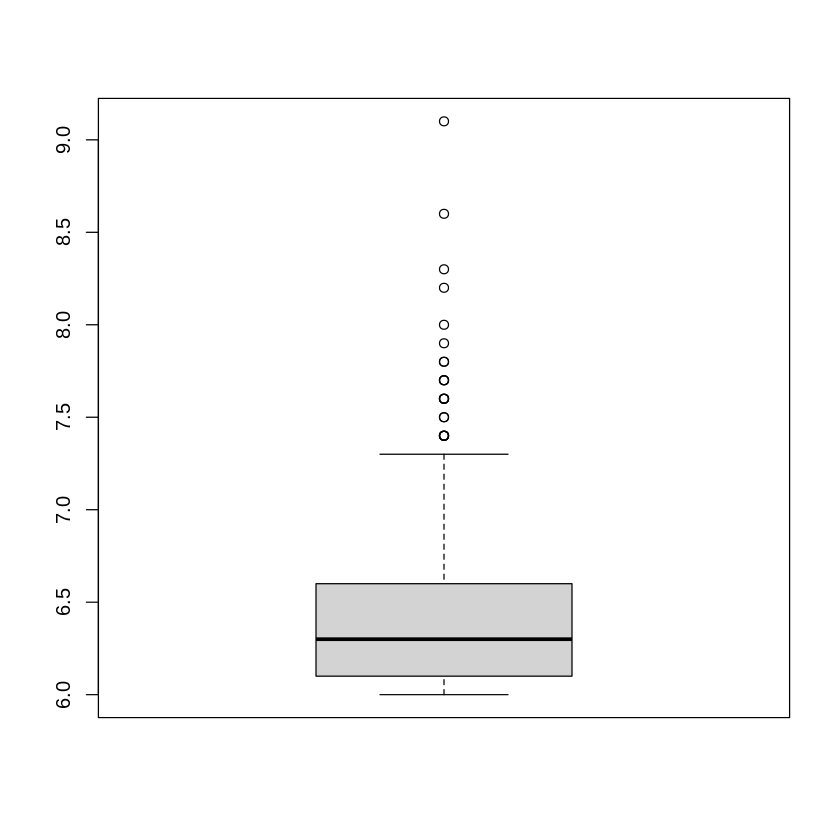

In [44]:
boxplot(df$mag)

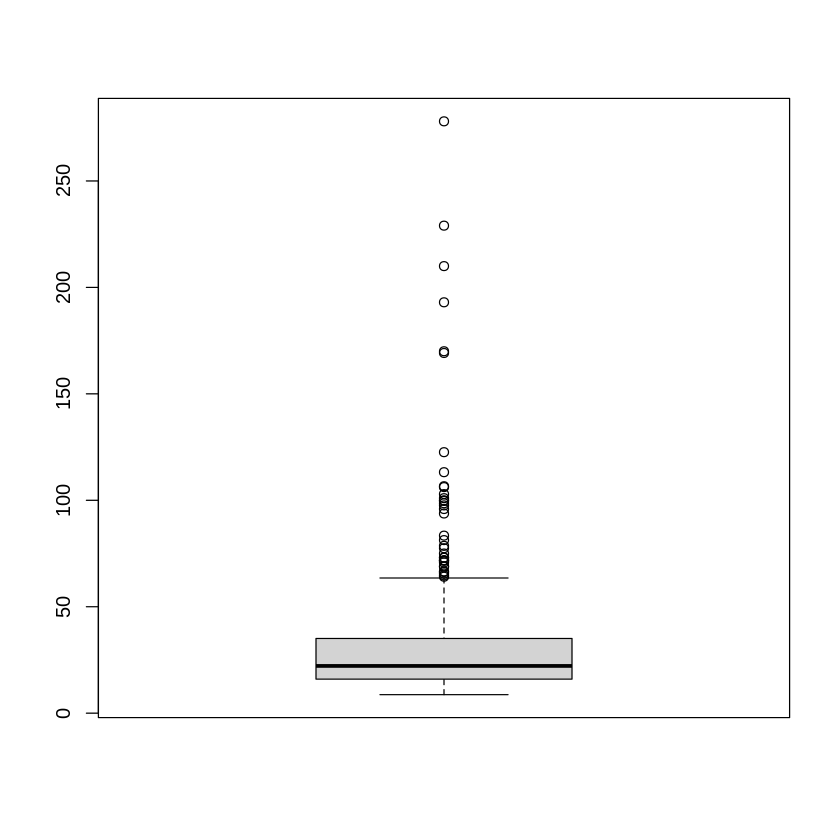

In [45]:
boxplot(df$gap)

Agora vamos remover os _outliers_ vistos no gráfico para cada um dos campos utilizando a função `which`.

In [46]:
outliers_mag <- boxplot(df$mag, plot=FALSE)$out
df <- df[-which(df$mag %in% outliers_mag),]

outliers_gap <- boxplot(df$gap, plot=FALSE)$out
df <- df[-which(df$gap %in% outliers_gap),]

df

time,lat,long,depth,mag,magType,nst,gap,rms,place
<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
2020-05-15 11:03:27,38.16890,-117.8497,2.70,6.50,ml,27,55.79,0.2669,"Monte Cristo Range, NV Earthquake"
2019-07-06 03:19:53,35.76950,-117.5993,8.00,7.10,mw,77,43.00,0.2200,2019 Ridgecrest Earthquake Sequence
2019-07-04 17:33:49,35.70533,-117.5038,10.50,6.40,mw,62,47.00,0.1600,Ridgecrest Earthquake Sequence
2014-08-24 10:20:44,38.21517,-122.3123,11.12,6.02,mw,369,28.00,0.1800,South Napa
2013-07-26 21:32:59,-57.91500,-23.8410,13.00,6.30,mww,166,25.00,1.3400,South Sandwich Islands region
2013-07-26 07:07:15,-15.37900,167.6890,124.00,6.10,mww,117,26.00,1.0800,"58 km ENE of Luganville, Vanuatu"
2013-07-22 07:01:42,-46.04900,34.7800,10.00,6.30,mww,259,22.00,1.1200,Prince Edward Islands region
2013-07-21 05:09:31,-41.70400,174.3370,17.00,6.50,mww,229,20.00,0.8500,"38 km ESE of Blenheim, New Zealand"
2013-07-17 02:37:43,-15.65700,-71.7400,7.00,6.00,mww,506,37.00,1.1900,"3 km ESE of Maca, Peru"


## 8. Desenhe diferentes _features_ para comparar uma contra a outra (dispersão vs histograma)

### Histograma

Vamos agrupar por magnitude na escala Richter.

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”


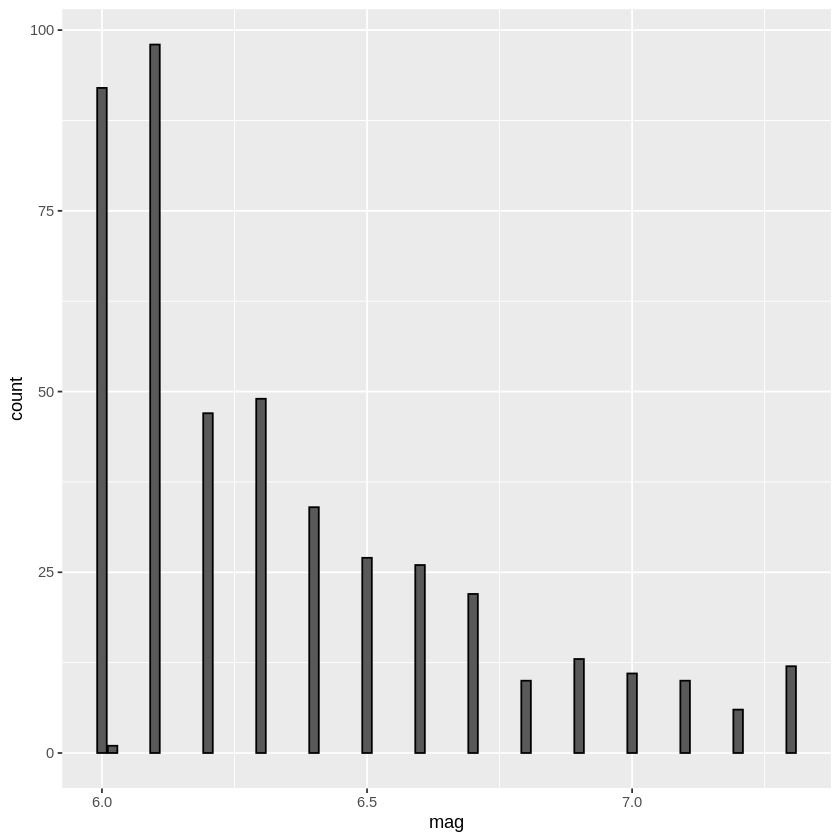

In [47]:
ggplot(df, aes(mag)) +
  geom_histogram(color = "black", stat='count')

## 9. Mapas de calor

Muito útil para encontrar correlação entre variáveis. Note que só é possível encontrar correlação entre variáveis numéricas.

In [49]:
df_cor <- cor(select(df, c('depth', 'mag', 'gap', 'rms')))
df_cor


,depth,mag,gap,rms
depth,1.00000000,0.1814418,-0.216202883,-0.085088109
mag,0.18144179,1.0000000,-0.285704621,0.123304785
gap,-0.21620288,-0.2857046,1.000000000,0.008144596
rms,-0.08508811,0.1233048,0.008144596,1.000000000


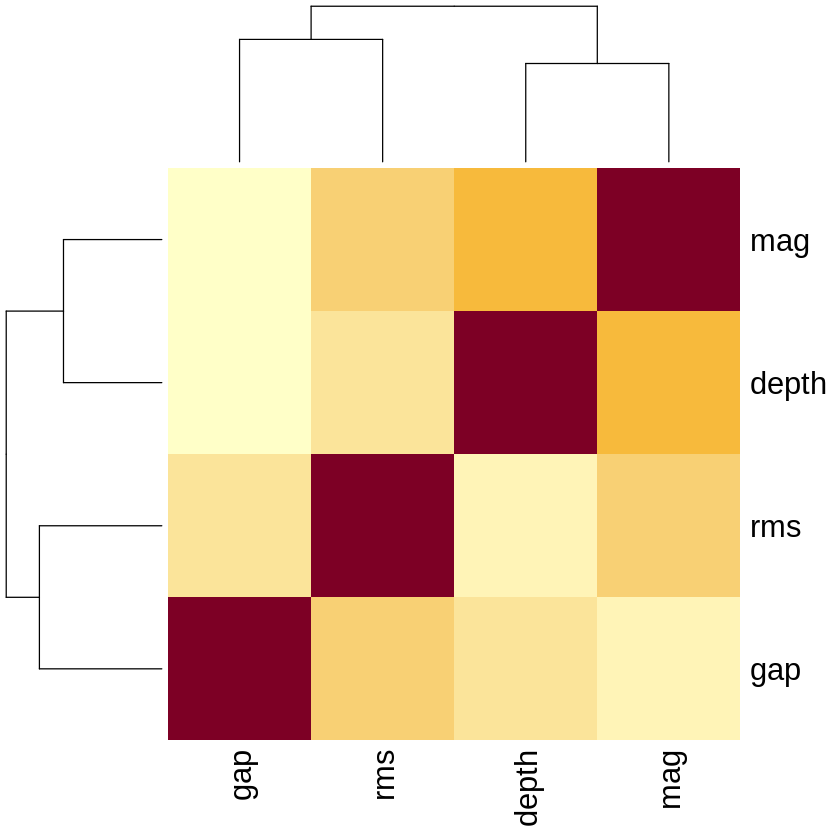

In [50]:
heatmap(df_cor, scale = "row")